# Imports

In [ ]:
import pandas as pd
import ast
from fuzzywuzzy import fuzz
import re
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import zscore, norm, spearmanr
from tqdm import tqdm


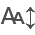

In [2]:
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)

# Load Raw Data

In [ ]:
df = pd.read_csv('raw_data.csv')

In [4]:
df

_id  \
0     6638a01cd8a5b440f8968b17   
1     6638a072d8a5b440f8968b25   
2     6638a1cbd8a5b440f8968b8c   
3     6638a148d8a5b440f8968b7c   
4     6638a037d8a5b440f8968b1d   
...                        ...   
1674  6751bb6b8750d5942a7da664   
1675  6751bba78750d5942a7da66c   
1676  6751bc188750d5942a7da670   
1677  675695678750d5942a7da73c   
1678  675698968750d5942a7da742   

                                           target_words  \
0     ['झंडा,डोरी,हवाईजहाज,कलम,कुर्सी,भुट्टा,पुल,दीव...   
1     ['मिट्टी,पत्ता,द्वार,चेहरा,बत्तख,फिल्म,आंधी,झी...   
2     ['गाल,बेल,सीढ़ी,कुर्सी,गाड़ी,लड़का,चिड़ियाघर,पा...   
3     ['गुड़िया,पैर,पहाड़,बछड़ा,ईंट,जड़,नक्शा,पिन,लो...   
4     ['खेत,मंडल,चॉक,भुट्टा,कवच,पैर,बहार,विद्यालय,कु...   
...                                                 ...   
1674  ['झाड़ू,सीढ़ी,दिल,सिक्का,चॉक,चप्पू,स्नान,चप्पू...   
1675  ['सिक्का,आस्तीन,कोहरा,गांजा,डिब्बा,भुट्टा,गाय,...   
1676  ['कान,नाव,नाक,मधुमक्खी,कार,खिलौना,कोहरा,कप,बत्...   
1677  ['मुर्गी,विदूषक,मुँह,समुद्र,मुस्कराहट,चप्पू,पै...   
1678  ['कवच,कांटा,दिल,मुर्गी,विदूषक,मुँह,समुद्र,मुस्...   

                                              responses   age   gender  \
0     ['विदाई ,झंडा ,डोरी ,हवाईजहाज ,कलम ,कुर्सी ,भु...  22.0     Male   
1     ['थैंक यू ,मिटटी ,सितारा ,बतख ,किरण ,पीना ,चील...  21.0     Male   
2     ['विदाई ,ेबल ,पापंची ,कृष्णा ,गाडी ,ोहल ,रोकरा...  24.0     Male   
3     ['विदाई ,पैर ,,बछड़ा ,बछड़ा ,ईंट ,,,पार्क ,,केक ...  22.0        M   
4     ['विदाई ,खेत ,,,भुटा ,कवच ,पैर ,खेत ,विधायल ,क...  20.0     Male   
...                                                 ...   ...      ...   
1674  ['विदाई ,झाड़ू ,सीडी ,दिल ,सिक्का ,चार्क ,चप्पू...  20.0  Female    
1675  ['धन्यवाद ,सिक्का,आस्टीन,कöहरा ,गांजा,डिब्बा,भ...   NaN      NaN   
1676  ['विदाई ,कान ,नाव ,नाक ,मधुमक्खी ,कार ,खिलौना ...  24.0    Male    
1677  [',मुर्गी ,विदूषक ,मुंह,समुद्र ,मुस्कराहट ,चप्...   NaN      NaN   
1678  [',कवच,कवच ,दिल ,मुर्गी ,विदूषक ,मुँह ,समुद्र ...   NaN      NaN   

      readingSkills  writingSkills  listeningSkills  speakingSkills  \
0               5.0            5.0              4.0             4.0   
1               4.0            4.0              4.0             4.0   
2               4.0            4.0              4.0             4.0   
3               3.0            2.0              2.0             3.0   
4               4.0            4.0              5.0             5.0   
...             ...            ...              ...             ...   
1674            4.0            4.0              4.0             4.0   
1675            5.0            5.0              5.0             5.0   
1676            NaN            4.0              4.0             NaN   
1677            5.0            4.0              5.0             4.0   
1678            5.0            4.0              5.0             4.0   

      average_rating  
0                4.5  
1                4.0  
2                4.0  
3                2.5  
4                4.5  
...              ...  
1674             4.0  
1675             5.0  
1676             4.0  
1677             4.5  
1678             4.5  

[1679 rows x 10 columns]

## Get Words List

In [26]:
words_df = pd.read_csv('words.csv')

In [27]:
words_df

word
Loading ITables v2.1.5 from the init_notebook_mode cell... (need help?)


In [32]:
unique_target_words = set(list(words_df['word']))

# Inclusion Critera # 1

### Only accept people with average hindi proficiency >= 4

In [5]:
df = df[df['average_rating'] >= 4].reset_index(drop=True)

In [38]:
df

_id  \
0     6638a01cd8a5b440f8968b17   
1     6638a072d8a5b440f8968b25   
2     6638a1cbd8a5b440f8968b8c   
3     6638a037d8a5b440f8968b1d   
4     6638a17ad8a5b440f8968b84   
...                        ...   
1097  6751bb6b8750d5942a7da664   
1098  6751bba78750d5942a7da66c   
1099  6751bc188750d5942a7da670   
1100  675695678750d5942a7da73c   
1101  675698968750d5942a7da742   

                                           target_words  \
0     ['झंडा,डोरी,हवाईजहाज,कलम,कुर्सी,भुट्टा,पुल,दीव...   
1     ['मिट्टी,पत्ता,द्वार,चेहरा,बत्तख,फिल्म,आंधी,झी...   
2     ['गाल,बेल,सीढ़ी,कुर्सी,गाड़ी,लड़का,चिड़ियाघर,पा...   
3     ['खेत,मंडल,चॉक,भुट्टा,कवच,पैर,बहार,विद्यालय,कु...   
4     ['बल्ला,कुर्सी,सेम,कार,घास,खेत,पैसा,हाथ,नाशपात...   
...                                                 ...   
1097  ['झाड़ू,सीढ़ी,दिल,सिक्का,चॉक,चप्पू,स्नान,चप्पू...   
1098  ['सिक्का,आस्तीन,कोहरा,गांजा,डिब्बा,भुट्टा,गाय,...   
1099  ['कान,नाव,नाक,मधुमक्खी,कार,खिलौना,कोहरा,कप,बत्...   
1100  ['मुर्गी,विदूषक,मुँह,समुद्र,मुस्कराहट,चप्पू,पै...   
1101  ['कवच,कांटा,दिल,मुर्गी,विदूषक,मुँह,समुद्र,मुस्...   

                                              responses   age   gender  \
0     ['विदाई ,झंडा ,डोरी ,हवाईजहाज ,कलम ,कुर्सी ,भु...  22.0     Male   
1     ['थैंक यू ,मिटटी ,सितारा ,बतख ,किरण ,पीना ,चील...  21.0     Male   
2     ['विदाई ,ेबल ,पापंची ,कृष्णा ,गाडी ,ोहल ,रोकरा...  24.0     Male   
3     ['विदाई ,खेत ,,,भुटा ,कवच ,पैर ,खेत ,विधायल ,क...  20.0     Male   
4     ['विदाई ,,कुर्सी ,,कार ,घास ,खेत ,पेड़ ,हाथ ,ना...  20.0     Male   
...                                                 ...   ...      ...   
1097  ['विदाई ,झाड़ू ,सीडी ,दिल ,सिक्का ,चार्क ,चप्पू...  20.0  Female    
1098  ['धन्यवाद ,सिक्का,आस्टीन,कöहरा ,गांजा,डिब्बा,भ...   NaN      NaN   
1099  ['विदाई ,कान ,नाव ,नाक ,मधुमक्खी ,कार ,खिलौना ...  24.0    Male    
1100  [',मुर्गी ,विदूषक ,मुंह,समुद्र ,मुस्कराहट ,चप्...   NaN      NaN   
1101  [',कवच,कवच ,दिल ,मुर्गी ,विदूषक ,मुँह ,समुद्र ...   NaN      NaN   

      readingSkills  writingSkills  listeningSkills  speakingSkills  \
0               5.0            5.0              4.0             4.0   
1               4.0            4.0              4.0             4.0   
2               4.0            4.0              4.0             4.0   
3               4.0            4.0              5.0             5.0   
4               4.0            3.0              4.0             5.0   
...             ...            ...              ...             ...   
1097            4.0            4.0              4.0             4.0   
1098            5.0            5.0              5.0             5.0   
1099            NaN            4.0              4.0             NaN   
1100            5.0            4.0              5.0             4.0   
1101            5.0            4.0              5.0             4.0   

      average_rating  
0                4.5  
1                4.0  
2                4.0  
3                4.5  
4                4.0  
...              ...  
1097             4.0  
1098             5.0  
1099             4.0  
1100             4.5  
1101             4.5  

[1102 rows x 10 columns]

In [43]:
df['target_words'][0][2:-2].split(",")

['झंडा',
 'डोरी',
 'हवाईजहाज',
 'कलम',
 'कुर्सी',
 'भुट्टा',
 'पुल',
 'दीवार',
 'किला',
 'विद्यालय',
 'पूंछ',
 'हाथगाड़ी']

# Exclusion Critera # 1

### Only accept people with >=2 pairs right

In [37]:
len(unique_target_words)

222

In [47]:
threshold = 50

all_counts = {}
correct_counts = {}

for word in unique_target_words:
    all_counts[word] = 0
    correct_counts[word] = 0
participant_count = []
filtered_rows = []
participant_col_dict = {}

words_df = pd.DataFrame(unique_target_words, columns=['word'])
    
for index, row in df.iterrows():

    try:
        target_words_list = row['target_words'][2:-2].split(",")

        responses_list = row['responses'][2:-2].split(",")

        pc = 0
        for i, word in enumerate(target_words_list):
            if i+1 < len(responses_list) and fuzz.ratio(responses_list[i+1], word) >= threshold:
                print(responses_list[i+1], word)
                pc += 1
                

        if pc >= 2:
            participant_id = row['_id']
            if participant_id not in participant_col_dict:
                participant_col_dict[participant_id] = f"participant_{len(participant_col_dict) + 1}"
            
            participant_col = participant_col_dict[participant_id]
            
            if participant_col not in words_df.columns:
                words_df[participant_col] = float('nan')

            row_with_pc = row.copy()
            row_with_pc['pc'] = pc
            filtered_rows.append(row_with_pc)

            for i, word in enumerate(target_words_list):
                all_counts[word] += 1
                if i+1 < len(responses_list) and fuzz.ratio(responses_list[i+1], word) >= threshold:
                    correct_counts[word] += 1
                    words_df.loc[words_df['word'] == word, participant_col] = 1
                else:
                    words_df.loc[words_df['word'] == word, participant_col] = 0

            participant_count.append(pc)
    except Exception as e:
        continue

filtered_df = pd.DataFrame(filtered_rows)


झंडा  झंडा
डोरी  डोरी
हवाईजहाज  हवाईजहाज
कलम  कलम
कुर्सी  कुर्सी
भुट्टा  भुट्टा
पुल  पुल
दीवार  दीवार
किला  किला
विद्यालय  विद्यालय
हाथगाड़ी  हाथगाड़ी
मिटटी  मिट्टी
चिड़ियाघर  चिड़ियाघर
पार्क  पार्क
दरवाज़ा  दरवाजा
बहार  बहार
पाइप  पाइप
कोहरा  कोहरा
खेत  खेत
भुटा  भुट्टा
कवच  कवच
पैर  पैर
विधायल  विद्यालय
कुर्सी  कुर्सी
कप  कप
घर  घर
कुर्सी  कुर्सी
कार  कार
घास  घास
खेत  खेत
हाथ  हाथ
नाशपती  नाशपाती
कीचड़  कीचड़
कठोर  कटोरा
बर्फ  बर्फ
गेंद  गेंद
पंख  पंख
बनियान  बनियान
द्वार  द्वार
बिल्ला  बिल्ला
बर्फ  बर्फ
सोफा  सोफा
खच्चर  खच्चर
चावल  चावल
कलम  कलम
आस्तीन  आस्तीन
शर्ट  शर्ट
स्टोव  स्टोव
डाली  डाली
कांच  कांच
फर्श  फर्श
आंधी  आंधी
पतंग  पतंग
नक्श  नकद
विद्याल्स  विद्यालय
सूरज  सूरज
खलीहान  खलिहान
जाल  जाल
गड्ढ़ा  गड्ढा 
बन्दर  बंदर
पत्ता  पत्ता
पाइप  पाइप
कुत्ता  कुत्ता
मुँह  मुँह
विद्यालय  विद्यालय
पैंट  पैंट
पहाड़  पहाड़
गुलाब  गुलाब
तालाब  तालाब
मोती  मोती
केक  केक
बछड़ा  बछड़ा
हथेली  हथेली
गुलाब  गुलाब
गाड़ी  गाड़ी
झील  झील
विद्यालय  विद्यालय
पैंट  पैंट
पहाड़  पहाड़
गुलाब  गुलाब
तालाब  तालाब

/var/folders/gs/mxlvlqw12jz3klfqvwssljpw0000gq/T/ipykernel_59332/951425053.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  words_df[participant_col] = float('nan')
/var/folders/gs/mxlvlqw12jz3klfqvwssljpw0000gq/T/ipykernel_59332/951425053.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  words_df[participant_col] = float('nan')
/var/folders/gs/mxlvlqw12jz3klfqvwssljpw0000gq/T/ipykernel_59332/951425053.py:37: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many tim

In [48]:
filtered_df

_id  \
0     6638a01cd8a5b440f8968b17   
2     6638a1cbd8a5b440f8968b8c   
3     6638a037d8a5b440f8968b1d   
4     6638a17ad8a5b440f8968b84   
5     66389f45d8a5b440f8968aed   
...                        ...   
1097  6751bb6b8750d5942a7da664   
1098  6751bba78750d5942a7da66c   
1099  6751bc188750d5942a7da670   
1100  675695678750d5942a7da73c   
1101  675698968750d5942a7da742   

                                           target_words  \
0     ['झंडा,डोरी,हवाईजहाज,कलम,कुर्सी,भुट्टा,पुल,दीव...   
2     ['गाल,बेल,सीढ़ी,कुर्सी,गाड़ी,लड़का,चिड़ियाघर,पा...   
3     ['खेत,मंडल,चॉक,भुट्टा,कवच,पैर,बहार,विद्यालय,कु...   
4     ['बल्ला,कुर्सी,सेम,कार,घास,खेत,पैसा,हाथ,नाशपात...   
5     ['कटोरा,सागरतट,बर्फ,सेम,थैला,बिस्तर,गेंद,पंख,ब...   
...                                                 ...   
1097  ['झाड़ू,सीढ़ी,दिल,सिक्का,चॉक,चप्पू,स्नान,चप्पू...   
1098  ['सिक्का,आस्तीन,कोहरा,गांजा,डिब्बा,भुट्टा,गाय,...   
1099  ['कान,नाव,नाक,मधुमक्खी,कार,खिलौना,कोहरा,कप,बत्...   
1100  ['मुर्गी,विदूषक,मुँह,समुद्र,मुस्कराहट,चप्पू,पै...   
1101  ['कवच,कांटा,दिल,मुर्गी,विदूषक,मुँह,समुद्र,मुस्...   

                                              responses   age   gender  \
0     ['विदाई ,झंडा ,डोरी ,हवाईजहाज ,कलम ,कुर्सी ,भु...  22.0     Male   
2     ['विदाई ,ेबल ,पापंची ,कृष्णा ,गाडी ,ोहल ,रोकरा...  24.0     Male   
3     ['विदाई ,खेत ,,,भुटा ,कवच ,पैर ,खेत ,विधायल ,क...  20.0     Male   
4     ['विदाई ,,कुर्सी ,,कार ,घास ,खेत ,पेड़ ,हाथ ,ना...  20.0     Male   
5     ['धन्यवाद ,कठोर ,गाड़ी ,बर्फ ,जमीन ,बर्फ ,कठोर ...  22.0     Male   
...                                                 ...   ...      ...   
1097  ['विदाई ,झाड़ू ,सीडी ,दिल ,सिक्का ,चार्क ,चप्पू...  20.0  Female    
1098  ['धन्यवाद ,सिक्का,आस्टीन,कöहरा ,गांजा,डिब्बा,भ...   NaN      NaN   
1099  ['विदाई ,कान ,नाव ,नाक ,मधुमक्खी ,कार ,खिलौना ...  24.0    Male    
1100  [',मुर्गी ,विदूषक ,मुंह,समुद्र ,मुस्कराहट ,चप्...   NaN      NaN   
1101  [',कवच,कवच ,दिल ,मुर्गी ,विदूषक ,मुँह ,समुद्र ...   NaN      NaN   

      readingSkills  writingSkills  listeningSkills  speakingSkills  \
0               5.0            5.0              4.0             4.0   
2               4.0            4.0              4.0             4.0   
3               4.0            4.0              5.0             5.0   
4               4.0            3.0              4.0             5.0   
5               4.0            4.0              5.0             5.0   
...             ...            ...              ...             ...   
1097            4.0            4.0              4.0             4.0   
1098            5.0            5.0              5.0             5.0   
1099            NaN            4.0              4.0             NaN   
1100            5.0            4.0              5.0             4.0   
1101            5.0            4.0              5.0             4.0   

      average_rating  pc  
0                4.5  11  
2                4.0   6  
3                4.5   8  
4                4.0   7  
5                4.5   8  
...              ...  ..  
1097             4.0  11  
1098             5.0  11  
1099             4.0  12  
1100             4.5  11  
1101             4.5  11  

[763 rows x 11 columns]

# Descriptive Statistics

In [50]:
filtered_df['gender'].unique()

array(['Male', 'male', 'Female', 'female', 'M', nan, 'Non Binary',
       'Female ', 'female ', 'Male ', '1990', 'male ', 'Mele ', 'Mail',
       'Com', 'Females ', 'MALE'], dtype=object)

In [52]:
def standardize_gender(gender):
    gender = str(gender).strip().lower()
    if re.match(r'^(male|m)$', gender, re.IGNORECASE):
        return 'male'
    elif re.match(r'^(female|f)$', gender, re.IGNORECASE):
        return 'female'
    else:
        return 'other'
    
filtered_df['gender'] = filtered_df['gender'].apply(standardize_gender)

gender_counts = filtered_df['gender'].value_counts()

In [53]:
gender_counts

male      455
other     164
female    144
Name: gender, dtype: int64

In [55]:
average_age = filtered_df['age'].mean()
standard_error_mean_age = filtered_df['age'].sem()

In [56]:
average_age, standard_error_mean_age

(25.492610837438423, 3.2527196132354264)

In [ ]:
np.array(participant_count).mean(), stats.sem(np.array(participant_count)) # Average number of words remembered correctly by participants

(9.48099606815203, 0.1126684671258923)

# Word-Mem Matrix

In [57]:
words_df

word  participant_1  participant_2  participant_3  participant_4  \
0      वर्षा            NaN            NaN            NaN            NaN   
1       सोना            NaN            NaN            NaN            NaN   
2    नाशपाती            NaN            NaN            NaN            1.0   
3      उल्लू            NaN            NaN            NaN            NaN   
4      बत्तख            NaN            NaN            NaN            NaN   
..       ...            ...            ...            ...            ...   
217     पतंग            NaN            NaN            NaN            NaN   
218   पिंजरा            NaN            NaN            NaN            NaN   
219     मोज़ा            NaN            NaN            NaN            NaN   
220      चाय            NaN            NaN            NaN            NaN   
221     धुआं            NaN            NaN            NaN            NaN   

     participant_5  participant_6  participant_7  participant_8  \
0              NaN            NaN            NaN            NaN   
1              NaN            NaN            NaN            NaN   
2              NaN            NaN            NaN            NaN   
3              NaN            NaN            NaN            NaN   
4              NaN            NaN            NaN            NaN   
..             ...            ...            ...            ...   
217            NaN            NaN            NaN            1.0   
218            NaN            NaN            NaN            NaN   
219            NaN            NaN            NaN            NaN   
220            NaN            NaN            NaN            NaN   
221            NaN            NaN            NaN            NaN   

     participant_9  ...  participant_754  participant_755  participant_756  \
0              0.0  ...              NaN              NaN              NaN   
1              NaN  ...              NaN              NaN              NaN   
2              NaN  ...              NaN              1.0              NaN   
3              NaN  ...              NaN              NaN              NaN   
4              NaN  ...              NaN              NaN              NaN   
..             ...  ...              ...              ...              ...   
217            NaN  ...              NaN              NaN              NaN   
218            NaN  ...              NaN              NaN              NaN   
219            NaN  ...              NaN              NaN              NaN   
220            NaN  ...              NaN              NaN              NaN   
221            NaN  ...              NaN              NaN              NaN   

     participant_757  participant_758  participant_759  participant_760  \
0                NaN              NaN              NaN              NaN   
1                NaN              1.0              NaN              NaN   
2                NaN              NaN              NaN              NaN   
3                NaN              NaN              NaN              NaN   
4                NaN              NaN              NaN              NaN   
..               ...              ...              ...              ...   
217              NaN              NaN              NaN              NaN   
218              NaN              NaN              NaN              NaN   
219              NaN              NaN              NaN              NaN   
220              NaN              NaN              NaN              NaN   
221              NaN              NaN              NaN              NaN   

     participant_761  participant_762  participant_763  
0                NaN              NaN              NaN  
1                NaN              NaN              NaN  
2                NaN              NaN              NaN  
3                NaN              NaN              NaN  
4                1.0              NaN              NaN  
..               ...              ...              ...  
217              NaN              NaN              Na

In [58]:
# Calculate the count of 1, 0, and NaN for each word
count_1 = words_df.iloc[:, 1:].apply(lambda x: (x == 1).sum(), axis=1)
count_0 = words_df.iloc[:, 1:].apply(lambda x: (x == 0).sum(), axis=1)
count_nan = words_df.iloc[:, 1:].apply(lambda x: x.isna().sum(), axis=1)

counts_df = pd.DataFrame({
    'word': words_df['word'],
    'count_1': count_1,
    'count_0': count_0,
    'count_nan': count_nan
})

In [63]:
counts_df["sum"] = counts_df["count_1"]+counts_df["count_0"]

In [73]:
counts_df["mem_score"] = counts_df["count_1"]/counts_df["sum"]

In [74]:
counts_df

word  count_1  count_0  count_nan  sum  mem_score
0      वर्षा       32        8        723   40      0.800
1       सोना       31        9        723   40      0.775
2    नाशपाती       37        3        723   40      0.925
3      उल्लू       32        8        723   40      0.800
4      बत्तख       26       14        723   40      0.650
..       ...      ...      ...        ...  ...        ...
217     पतंग       35        5        723   40      0.875
218   पिंजरा       25       15        723   40      0.625
219     मोज़ा       28       12        723   40      0.700
220      चाय       35        5        723   40      0.875
221     धुआं       32        8        723   40      0.800

[222 rows x 6 columns]

In [ ]:
counts_df["sum"].mean(), counts_df["sum"].sem() # Average Number of Participants that saw a target

(40.18018018018018, 0.04007473166357832)

# Visualisation and Consistency Checks

In [67]:
# Extract matrix from words_df, ignoring the first column (words)
matrix = words_df.iloc[:, 1:].to_numpy()

### Distribution of Number of Participants

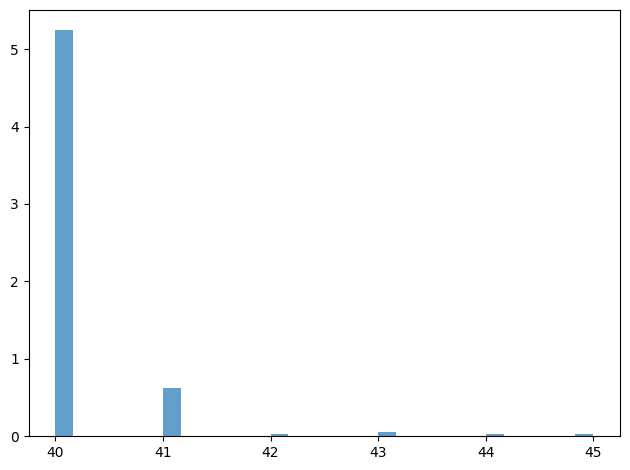

In [68]:
plt.hist(list(counts_df['sum']), bins=30, density=True, alpha=0.7, label='Distribution of ρz (Group 1 and 2)')
plt.tight_layout()
plt.show()

### Split Half

In [69]:
subid = np.arange(matrix.shape[1])

In [70]:
matrix.shape

(222, 763)

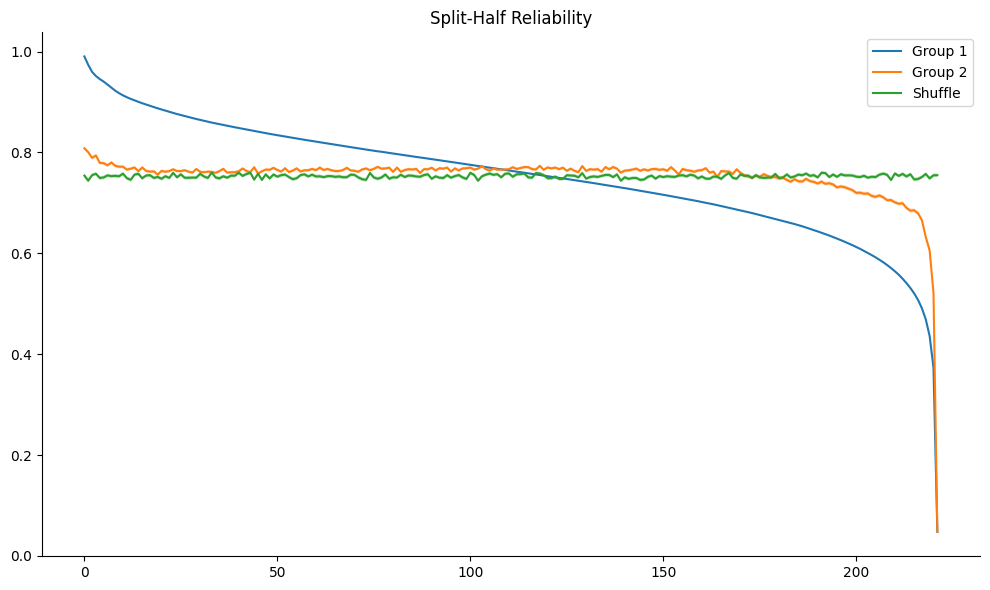

In [71]:
for iword in range(222):
    if iword < matrix.shape[0]:  # To ensure we don't exceed the matrix dimensions
        matrix[iword, np.random.choice(subid, 2, replace=False)] = 0

group1memorability_sorted = []
group2memorability_sorted = []
shuffled_memorability = []

# Perform the split-half reliability calculation
for _ in range(1000):
    group1id = np.random.choice(subid, len(subid) // 2, replace=False)
    group2id = subid[~np.isin(subid, group1id)]

    group1memorability = np.nanmean(matrix[:, group1id], axis=1)
    group2memorability = np.nanmean(matrix[:, group2id], axis=1)

    sort_order = (-group1memorability).argsort()
    group1memorability_sorted.append(group1memorability[sort_order])
    group2memorability_sorted.append(group2memorability[sort_order])
    shuffled_memorability.append(group2memorability[np.random.permutation(sort_order)])

group1memorability_sorted = np.array(group1memorability_sorted)
group2memorability_sorted = np.array(group2memorability_sorted)
shuffled_memorability = np.array(shuffled_memorability)

# Calculate mean and standard error of the mean for each group
group1_mean = np.nanmean(group1memorability_sorted, axis=0)
group2_mean = np.nanmean(group2memorability_sorted, axis=0)
shuffle_mean = np.nanmean(shuffled_memorability, axis=0)

group1_sem = np.std(group1memorability_sorted, axis=0) / np.sqrt(1000)
group2_sem = np.std(group2memorability_sorted, axis=0) / np.sqrt(1000)
shuffle_sem = np.std(shuffled_memorability, axis=0) / np.sqrt(1000)

# Plotting
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

axes.plot(group1_mean, label='Group 1')
axes.plot(group2_mean, label='Group 2')
axes.plot(shuffle_mean, label='Shuffle')

axes.fill_between(range(len(group1_mean)), group1_mean - group1_sem, group1_mean + group1_sem, alpha=0.3)
axes.fill_between(range(len(group2_mean)), group2_mean - group2_sem, group2_mean + group2_sem, alpha=0.3)
axes.fill_between(range(len(shuffle_mean)), shuffle_mean - shuffle_sem, shuffle_mean + shuffle_sem, alpha=0.3)

axes.legend()
axes.set_title('Split-Half Reliability')

# Remove top and right spines
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
axes.yaxis.set_ticks_position('left')
axes.xaxis.set_ticks_position('bottom')

plt.tight_layout()

# plt.savefig("figures/consistency_analysis.pdf", format='pdf', dpi=300)

plt.show()

100%|██████████| 5000/5000 [00:35<00:00, 141.59it/s]


Mean rho:  0.2172145895769615
Mean shuffled rho:  -7.631005187422928e-05


100%|██████████| 10000/10000 [00:00<00:00, 15971.35it/s]


95% CI:  [0.21604259 0.21841747]
P-value:  0.41402055763639556


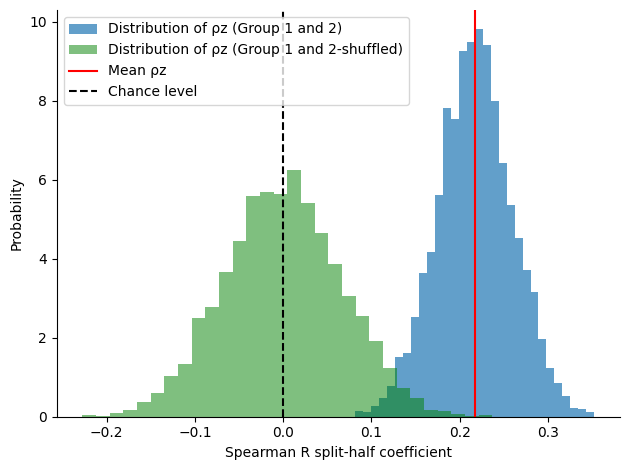

In [72]:
matrix = words_df.iloc[:, 1:].to_numpy()
num_subjects = matrix.shape[1]

correlations = []
shuffled_correlations = []

for iter in tqdm(range(5000)):
    half_1_means = []
    half_2_means = []
    
    for i in range(matrix.shape[0]):
        # Get non-NaN indices for the current word
        valid_indices = np.where(~np.isnan(matrix[i, :]))[0]
        
        if len(valid_indices) >= 2:  # Only proceed if we have at least 2 valid subjects to split
            # Randomly split the valid subjects into two halves
            group1_id = np.random.choice(valid_indices, len(valid_indices) // 2, replace=False)
            group2_id = np.setdiff1d(valid_indices, group1_id)

            # Calculate means for each half, ignoring NaN values
            half_1_mean = np.mean(matrix[i, group1_id])
            half_2_mean = np.mean(matrix[i, group2_id])
        else:
            # If not enough valid data, skip this word
            half_1_mean = np.nan
            half_2_mean = np.nan

        half_1_means.append(half_1_mean)
        half_2_means.append(half_2_mean)

    half_1_means = np.array(half_1_means)
    half_2_means = np.array(half_2_means)

    # Calculate Spearman correlation for valid data (non-NaN)
    valid_correlation_indices = ~np.isnan(half_1_means) & ~np.isnan(half_2_means)
    if np.sum(valid_correlation_indices) > 0:
        sr, pv = spearmanr(half_1_means[valid_correlation_indices], half_2_means[valid_correlation_indices])
        correlations.append(sr)

        # For shuffled data
        shuffled_half_2 = np.random.permutation(half_2_means[valid_correlation_indices])
        sr_shuffled, pv_shuffled = spearmanr(half_1_means[valid_correlation_indices], shuffled_half_2)
        shuffled_correlations.append(sr_shuffled)

# Convert lists to arrays for further calculations
correlations = np.array(correlations)
shuffled_correlations = np.array(shuffled_correlations)

# Mean of the correlations
mean_rhoz = np.nanmean(correlations)
mean_shuffled_rhoz = np.nanmean(shuffled_correlations)
print("Mean rho: ", mean_rhoz)
print("Mean shuffled rho: ", mean_shuffled_rhoz)

# Bootstrap for 95% CI
bootstrap_samples = 10000
bootstrap_means = []

for _ in tqdm(range(bootstrap_samples)):
    sample = np.random.choice(correlations, len(correlations), replace=True)
    bootstrap_means.append(np.nanmean(sample))

conf_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% CI: ", conf_interval)

# Calculate p-value (one-tailed, Z-transformed coefficient is greater than chance)
p_value = 1 - norm.cdf(mean_rhoz)
print("P-value: ", p_value)

# Plotting
plt.hist(correlations, bins=30, density=True, alpha=0.7, label='Distribution of ρz (Group 1 and 2)')
plt.hist(shuffled_correlations, bins=30, density=True, alpha=0.5, color='green', label='Distribution of ρz (Group 1 and 2-shuffled)')
plt.axvline(mean_rhoz, color='red', label='Mean ρz')
plt.axvline(mean_shuffled_rhoz, color='black', linestyle='--', label='Chance level')
plt.xlabel("Spearman R split-half coefficient")
plt.ylabel("Probability")
plt.legend()

# Get the current axes and adjust the spines
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.tight_layout()

# plt.savefig("figures/split_half.pdf", format='pdf', dpi=300)

plt.show()


### Memorability Distribution

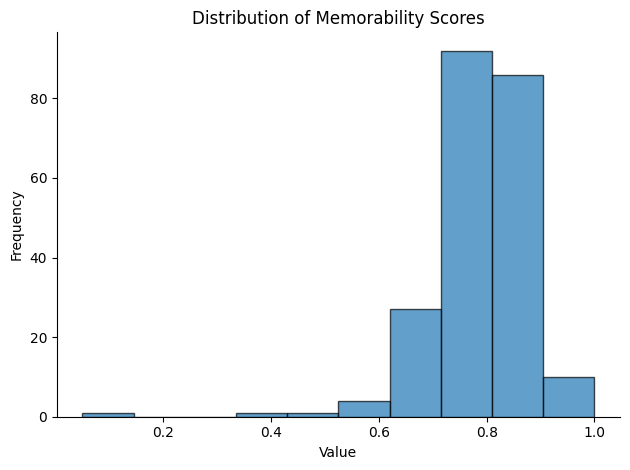

In [75]:
plt.hist(counts_df['mem_score'], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Memorability Scores')

# Remove top and right spines
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')

plt.tight_layout()
plt.show()